In [1]:
from preprocessing import *
from train_evaluate import *
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torchsummary import summary

import numpy as np

# Data Setup

## Load Data

In [2]:
data_dir = '/Users/michael/Desktop/Home/研究所/ECE247/projects/data/'
X_train_valid, y_train_valid, X_test, y_test = load_data(data_dir, subjects=[1]) # default subjects=[1,2,3,4,5,6,7,8,9]

## Preprocessing

In [3]:
x_train, y_train, x_valid, y_valid, x_test, y_test = main_prep(X_train_valid,y_train_valid,X_test, y_test,2,2,True)

Shape of x_train: (758, 250, 1, 22)
Shape of x_valid: (190, 250, 1, 22)
Shape of x_test: (200, 250, 1, 22)
Shape of y_train: torch.Size([758, 4])
Shape of y_valid: torch.Size([190, 4])
Shape of y_test: torch.Size([200, 4])


## PyTorch Dataloaders

In [22]:
data_loaders  = dataloader_setup(x_train, y_train, x_valid, y_valid, x_test, y_test, batch_size=32)

## Parameters

In [8]:
LR      = 0.0005
BETAS   = (0.9, 0.999)
EPS     = 1e-08
DECAY   = 0.0005

BATCH_SIZE = 32
EPOCHS  = 100

# Modeling (CNN, LSTM, GRU, CNN+LSTM, CNN+GRU)

## CNN

In [41]:
class CNN(nn.Module):
    
    def __init__(self):
        super().__init__()
        #conv layers
        # 250: input channels, 10: output channels, 5x5: square convolution kernel
        self.conv1 = nn.Conv2d(22, 25, 1)
        self.conv2 = nn.Conv2d(250, 25, 1)
        self.pool = nn.MaxPool2d(1, stride=3)
        self.conv3 = nn.Conv2d(25, 50, 1)
        ''
        # affine layers
        self.fc1 = nn.Linear(150, 400)
        self.fc2 = nn.Linear(400, 120)
        self.fc3 = nn.Linear(120, 80)
        self.fc4 = nn.Linear(80, 4) # 4 for output classes

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(torch.transpose(x, 1, 3))))
        x = self.pool(F.relu(self.conv3(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return x


In [42]:
# initiate LSTM model
cnn = CNN()

# create your optimizer
optimizer = optim.Adam(cnn.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.39395
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.38280
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.35810
	Train loss: 0.04138, Accuracy: 392/758 (51.00%)
	Validation loss: 0.00704, Accuracy: 71/190 (37.00%)
	Test loss: 0.00695, Accuracy: 59/200 (29.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.29917
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.16764
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.10936
	Train loss: 0.02869, Accuracy: 496/758 (65.00%)
	Validation loss: 0.00631, Accuracy: 93/190 (48.00%)
	Test loss: 0.00728, Accuracy: 71/200 (35.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 0.91878
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 0.58784
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 0.71690
	Train loss: 0.01493, Accuracy: 652/758 (86.00%)
	Validation loss: 0.00479, Accuracy: 122/190 (64.00%)
	Test loss: 0.00833, Accuracy: 78/200 (39.00%)



Training Progress: 	Epoch 25 [640/758 (83.33%)]		Loss: 0.00052
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00068, Accuracy: 185/190 (97.00%)
	Test loss: 0.02557, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.00033
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.00016
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.00063
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00068, Accuracy: 185/190 (97.00%)
	Test loss: 0.02567, Accuracy: 65/200 (32.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.00029
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.00016
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.00053
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00068, Accuracy: 185/190 (97.00%)
	Test loss: 0.02579, Accuracy: 65/200 (32.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.00024
Training Progress: 	Epoch 28 [320/758 (41.67%)]		

	Test loss: 0.02691, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.00016
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.00012
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.00055
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00074, Accuracy: 184/190 (96.00%)
	Test loss: 0.02694, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.00021
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.00007
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.00042
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00076, Accuracy: 183/190 (96.00%)
	Test loss: 0.02701, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.00016
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.00013
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.00043
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00075, Accuracy: 183

Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.00046
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00078, Accuracy: 183/190 (96.00%)
	Test loss: 0.02742, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.00023
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.00012
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.00035
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00078, Accuracy: 183/190 (96.00%)
	Test loss: 0.02751, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.00021
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.00011
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.00036
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00078, Accuracy: 183/190 (96.00%)
	Test loss: 0.02748, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.00018
Training Progress: 	Epoch 77 [320/758 (41.67%)]		

	Test loss: 0.02798, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.00022
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.00011
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.00037
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00079, Accuracy: 184/190 (96.00%)
	Test loss: 0.02811, Accuracy: 62/200 (31.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.00016
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.00013
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.00033
	Train loss: 0.00001, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00079, Accuracy: 183/190 (96.00%)
	Test loss: 0.02809, Accuracy: 64/200 (32.00%)

Best validation accuracy:
0.9736842105263158
Best test accuracy:
0.395


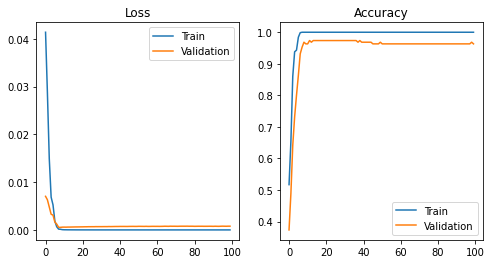

In [43]:
train_and_evaluate(cnn, optimizer, data_loaders, num_epochs=EPOCHS)

## LSTM

In [9]:
class LSTM(nn.Module):
    
    def __init__(self):
        super(LSTM, self).__init__()

        self.lstm = nn.LSTM(22, 64, 3, batch_first=True, dropout=0.4)

        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.4),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )
    
    def forward(self, x, h=None):

        # LSTM
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 2, 1)
        out, _ = self.lstm(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out

In [10]:
# initiate LSTM model
lstm = LSTM()

# create your optimizer
optimizer = optim.Adam(lstm.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.39611
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.45574
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.38174
	Train loss: 0.04390, Accuracy: 207/758 (27.00%)
	Validation loss: 0.00737, Accuracy: 52/190 (27.00%)
	Test loss: 0.00706, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.41473
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.40813
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.41388
	Train loss: 0.04123, Accuracy: 312/758 (41.00%)
	Validation loss: 0.00717, Accuracy: 64/190 (33.00%)
	Test loss: 0.00702, Accuracy: 43/200 (21.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.29013
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.33394
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.31862
	Train loss: 0.03980, Accuracy: 362/758 (47.00%)
	Validation loss: 0.00706, Accuracy: 72/190 (37.00%)
	Test loss: 0.00705, Accuracy: 46/200 (23.00%)

T

	Train loss: 0.00818, Accuracy: 714/758 (94.00%)
	Validation loss: 0.00269, Accuracy: 156/190 (82.00%)
	Test loss: 0.01068, Accuracy: 53/200 (26.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.39423
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.37482
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.21092
	Train loss: 0.00507, Accuracy: 724/758 (95.00%)
	Validation loss: 0.00218, Accuracy: 163/190 (85.00%)
	Test loss: 0.01152, Accuracy: 57/200 (28.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.21117
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.22141
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.15006
	Train loss: 0.00498, Accuracy: 728/758 (96.00%)
	Validation loss: 0.00250, Accuracy: 162/190 (85.00%)
	Test loss: 0.01130, Accuracy: 52/200 (26.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.25946
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.31199
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Los

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.10503
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.03746
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.10574
	Train loss: 0.00126, Accuracy: 751/758 (99.00%)
	Validation loss: 0.00170, Accuracy: 172/190 (90.00%)
	Test loss: 0.01365, Accuracy: 65/200 (32.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.13467
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.14490
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.11926
	Train loss: 0.00151, Accuracy: 746/758 (98.00%)
	Validation loss: 0.00138, Accuracy: 175/190 (92.00%)
	Test loss: 0.01421, Accuracy: 65/200 (32.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.18957
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.08117
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.15728
	Train loss: 0.00035, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00101, Accuracy: 180/190 (94.00%)
	Test loss: 0.01400, Accuracy: 68/20

Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.02081
	Train loss: 0.00029, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00150, Accuracy: 175/190 (92.00%)
	Test loss: 0.01630, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.07863
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.01107
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.01394
	Train loss: 0.00032, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00125, Accuracy: 177/190 (93.00%)
	Test loss: 0.01600, Accuracy: 70/200 (35.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.04614
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.00993
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.02043
	Train loss: 0.00018, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00136, Accuracy: 176/190 (92.00%)
	Test loss: 0.01633, Accuracy: 58/200 (29.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.06706
Training Progress: 	Epoch 77 [320/758 (41.67%)]		Lo

	Validation loss: 0.00114, Accuracy: 181/190 (95.00%)
	Test loss: 0.01671, Accuracy: 69/200 (34.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.01559
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.01455
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.00813
	Train loss: 0.00054, Accuracy: 753/758 (99.00%)
	Validation loss: 0.00148, Accuracy: 178/190 (93.00%)
	Test loss: 0.01655, Accuracy: 69/200 (34.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.37918
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.08505
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.04100
	Train loss: 0.00025, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00147, Accuracy: 178/190 (93.00%)
	Test loss: 0.01780, Accuracy: 60/200 (30.00%)

Best validation accuracy:
0.9631578947368421
Best test accuracy:
0.395


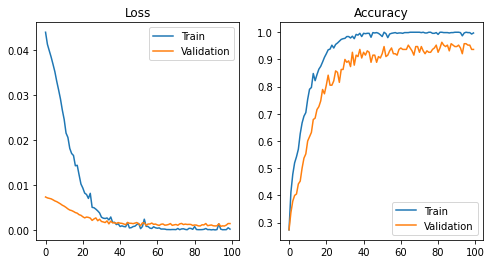

In [8]:
train_and_evaluate(lstm, optimizer, data_loaders, num_epochs=EPOCHS)

## GRU

In [12]:
class GRU(nn.Module):
    
    def __init__(self):
        super(GRU, self).__init__()

        self.gru = nn.GRU(22, 64, 3, batch_first=True, dropout=0.4)

        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.4),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )
    
    def forward(self, x, h=None):

        # GRU
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 2, 1)
        out, _ = self.gru(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out


In [13]:
# initiate LSTM model
gru = GRU()

# create your optimizer
optimizer = optim.Adam(gru.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.45513
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.45325
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.38381
	Train loss: 0.04229, Accuracy: 247/758 (32.00%)
	Validation loss: 0.00721, Accuracy: 55/190 (28.00%)
	Test loss: 0.00679, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.38469
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.34475
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.41266
	Train loss: 0.04107, Accuracy: 286/758 (37.00%)
	Validation loss: 0.00706, Accuracy: 63/190 (33.00%)
	Test loss: 0.00680, Accuracy: 65/200 (32.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.34406
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.22943
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.42019
	Train loss: 0.04005, Accuracy: 332/758 (43.00%)
	Validation loss: 0.00697, Accuracy: 73/190 (38.00%)
	Test loss: 0.00671, Accuracy: 73/200 (36.00%)

T

	Train loss: 0.00745, Accuracy: 711/758 (93.00%)
	Validation loss: 0.00294, Accuracy: 154/190 (81.00%)
	Test loss: 0.01072, Accuracy: 56/200 (28.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.47570
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.35055
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.31219
	Train loss: 0.00668, Accuracy: 712/758 (93.00%)
	Validation loss: 0.00282, Accuracy: 151/190 (79.00%)
	Test loss: 0.01039, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.61952
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.25527
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.27582
	Train loss: 0.00548, Accuracy: 723/758 (95.00%)
	Validation loss: 0.00240, Accuracy: 163/190 (85.00%)
	Test loss: 0.01063, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.54303
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.30471
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Los

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.14429
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.10182
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.18626
	Train loss: 0.00083, Accuracy: 755/758 (99.00%)
	Validation loss: 0.00173, Accuracy: 174/190 (91.00%)
	Test loss: 0.01543, Accuracy: 54/200 (27.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.25713
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.19985
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.04703
	Train loss: 0.00095, Accuracy: 753/758 (99.00%)
	Validation loss: 0.00187, Accuracy: 173/190 (91.00%)
	Test loss: 0.01392, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.18570
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.18519
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.12269
	Train loss: 0.00075, Accuracy: 754/758 (99.00%)
	Validation loss: 0.00208, Accuracy: 171/190 (90.00%)
	Test loss: 0.01534, Accuracy: 60/200

Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.05211
	Train loss: 0.00024, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00151, Accuracy: 177/190 (93.00%)
	Test loss: 0.01675, Accuracy: 61/200 (30.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.22175
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.05802
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.02351
	Train loss: 0.00024, Accuracy: 757/758 (99.00%)
	Validation loss: 0.00159, Accuracy: 179/190 (94.00%)
	Test loss: 0.01776, Accuracy: 55/200 (27.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.05065
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.05975
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.03520
	Train loss: 0.00061, Accuracy: 754/758 (99.00%)
	Validation loss: 0.00209, Accuracy: 174/190 (91.00%)
	Test loss: 0.01880, Accuracy: 49/200 (24.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.17704
Training Progress: 	Epoch 77 [320/758 (41.67%)]		Lo

	Validation loss: 0.00178, Accuracy: 179/190 (94.00%)
	Test loss: 0.01761, Accuracy: 58/200 (29.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.08734
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.04158
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.03720
	Train loss: 0.00007, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00147, Accuracy: 180/190 (94.00%)
	Test loss: 0.01860, Accuracy: 54/200 (27.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.03135
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.37708
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.01823
	Train loss: 0.00034, Accuracy: 755/758 (99.00%)
	Validation loss: 0.00195, Accuracy: 174/190 (91.00%)
	Test loss: 0.02030, Accuracy: 49/200 (24.00%)

Best validation accuracy:
0.9473684210526315
Best test accuracy:
0.395


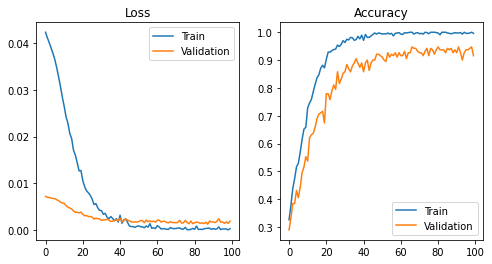

In [12]:
train_and_evaluate(gru, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN+LSTM

In [15]:
class Permute(nn.Module):
    def forward(self, x):
        return x.permute(0, 2, 1, 3)
    
class CNN_LSTM(nn.Module):
    
    def __init__(self):
        super(CNN_LSTM, self).__init__()

        self.conv1 = nn.Conv2d(22, 25, 1)
        self.conv2 = nn.Conv2d(250, 25, 1)
        self.pool = nn.MaxPool2d(1, stride=3)
        self.conv3 = nn.Conv2d(25, 50, 1)
        
        
        self.lstm = nn.LSTM(3, 64, 3, batch_first=True, dropout=0.4)
        
        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.4),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )

        

    
    def forward(self, x):
        
        # CNN
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(torch.transpose(x, 1, 3))))
        x = self.pool(F.relu(self.conv3(x)))

        # LSTM
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 1, 2)
        out, _ = self.lstm(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out

In [16]:
# initiate LSTM model
cnn_lstm = CNN_LSTM()

# create your optimizer
optimizer = optim.Adam(cnn_lstm.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.48809
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.41443
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.43939
	Train loss: 0.04390, Accuracy: 192/758 (25.00%)
	Validation loss: 0.00731, Accuracy: 48/190 (25.00%)
	Test loss: 0.00697, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.29777
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.43705
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.32180
	Train loss: 0.04320, Accuracy: 225/758 (29.00%)
	Validation loss: 0.00730, Accuracy: 52/190 (27.00%)
	Test loss: 0.00696, Accuracy: 55/200 (27.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.43144
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.33350
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.29787
	Train loss: 0.04122, Accuracy: 296/758 (39.00%)
	Validation loss: 0.00708, Accuracy: 67/190 (35.00%)
	Test loss: 0.00679, Accuracy: 57/200 (28.00%)

T

	Train loss: 0.00227, Accuracy: 748/758 (98.00%)
	Validation loss: 0.00214, Accuracy: 167/190 (87.00%)
	Test loss: 0.01110, Accuracy: 83/200 (41.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.18222
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.05637
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.07088
	Train loss: 0.00126, Accuracy: 753/758 (99.00%)
	Validation loss: 0.00176, Accuracy: 168/190 (88.00%)
	Test loss: 0.01060, Accuracy: 86/200 (43.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.18730
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.14604
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.06088
	Train loss: 0.00079, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00138, Accuracy: 174/190 (91.00%)
	Test loss: 0.01175, Accuracy: 76/200 (38.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.11890
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.02985
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Lo

	Test loss: 0.01383, Accuracy: 79/200 (39.00%)

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.03190
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.01321
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.01768
	Train loss: 0.00021, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00147, Accuracy: 178/190 (93.00%)
	Test loss: 0.01470, Accuracy: 81/200 (40.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.03293
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.01767
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.02371
	Train loss: 0.00020, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00159, Accuracy: 175/190 (92.00%)
	Test loss: 0.01498, Accuracy: 78/200 (39.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.03949
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.01112
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.01658
	Train loss: 0.00066, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00160, Accuracy: 175/

Training Progress: 	Epoch 74 [320/758 (41.67%)]		Loss: 0.00466
Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.00928
	Train loss: 0.00005, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00138, Accuracy: 179/190 (94.00%)
	Test loss: 0.01605, Accuracy: 89/200 (44.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.02569
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.00554
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.01400
	Train loss: 0.00006, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00160, Accuracy: 177/190 (93.00%)
	Test loss: 0.01664, Accuracy: 86/200 (43.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.01483
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.00932
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.00452
	Train loss: 0.00005, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00154, Accuracy: 178/190 (93.00%)
	Test loss: 0.01657, Accuracy: 86/200 (43.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		

	Train loss: 0.00009, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00139, Accuracy: 180/190 (94.00%)
	Test loss: 0.01551, Accuracy: 83/200 (41.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.10319
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.01185
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.01033
	Train loss: 0.00007, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00139, Accuracy: 180/190 (94.00%)
	Test loss: 0.01636, Accuracy: 79/200 (39.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.00876
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.00358
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.00412
	Train loss: 0.00004, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00154, Accuracy: 179/190 (94.00%)
	Test loss: 0.01591, Accuracy: 85/200 (42.00%)

Best validation accuracy:
0.9473684210526315
Best test accuracy:
0.465


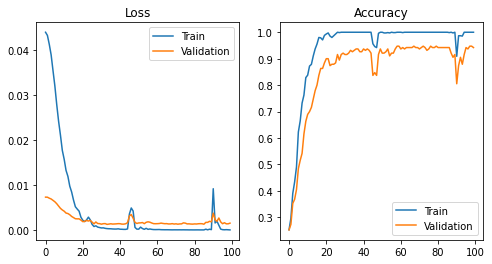

In [108]:
train_and_evaluate(cnn_lstm, optimizer, data_loaders, num_epochs=EPOCHS)

## CNN+GRU

In [18]:
class CNN_GRU(nn.Module):
    
    def __init__(self):
        super(CNN_GRU, self).__init__()

        self.conv1 = nn.Conv2d(22, 25, 1)
        self.conv2 = nn.Conv2d(250, 25, 1)
        self.pool = nn.MaxPool2d(1, stride=3)
        self.conv3 = nn.Conv2d(25, 50, 1)
        
        self.gru = nn.GRU(3, 64, 3, batch_first=True, dropout=0.4)
        
        self.fc = nn.Sequential(
            nn.Linear(64, 54),
            nn.BatchNorm1d(num_features=54, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Dropout(p=0.4),
            nn.Linear(54, 44),
            nn.BatchNorm1d(num_features=44, eps=1e-05, momentum=0.2, affine=True),
            nn.ReLU(inplace = True),
            nn.Linear(44, 4)
        )

    
    def forward(self, x):

        # CNN
        x = F.relu(self.conv1(x))
        x = self.pool(F.relu(self.conv2(torch.transpose(x, 1, 3))))
        x = self.pool(F.relu(self.conv3(x)))

        # GRU
        N, C, H, W = x.size()
        x = x.view(N, C, W).permute(0, 1, 2)
        out, _ = self.gru(x)

        # Fully Connected Layer
        out = self.fc(out[:, -1, :])

        return out

In [19]:
# initiate LSTM model
cnn_gru = CNN_GRU()

# create your optimizer
optimizer = optim.Adam(cnn_gru.parameters(), lr=LR, betas=BETAS, eps=EPS, weight_decay=DECAY)

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.40849
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.45402
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.48062
	Train loss: 0.04394, Accuracy: 232/758 (30.00%)
	Validation loss: 0.00733, Accuracy: 63/190 (33.00%)
	Test loss: 0.00701, Accuracy: 50/200 (25.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.29932
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.49059
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.39996
	Train loss: 0.04239, Accuracy: 268/758 (35.00%)
	Validation loss: 0.00715, Accuracy: 64/190 (33.00%)
	Test loss: 0.00694, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.37628
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.33758
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.33414
	Train loss: 0.03988, Accuracy: 304/758 (40.00%)
	Validation loss: 0.00690, Accuracy: 71/190 (37.00%)
	Test loss: 0.00678, Accuracy: 61/200 (30.00%)

T

	Train loss: 0.00089, Accuracy: 754/758 (99.00%)
	Validation loss: 0.00116, Accuracy: 180/190 (94.00%)
	Test loss: 0.01318, Accuracy: 63/200 (31.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.08271
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.09409
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.18151
	Train loss: 0.00087, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00114, Accuracy: 181/190 (95.00%)
	Test loss: 0.01263, Accuracy: 61/200 (30.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.10319
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.03426
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.12846
	Train loss: 0.00073, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00117, Accuracy: 180/190 (94.00%)
	Test loss: 0.01306, Accuracy: 61/200 (30.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.10327
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.01955
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Los

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.03079
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.00683
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.06827
	Train loss: 0.00074, Accuracy: 755/758 (99.00%)
	Validation loss: 0.00185, Accuracy: 175/190 (92.00%)
	Test loss: 0.01525, Accuracy: 70/200 (35.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.02588
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.01268
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.09582
	Train loss: 0.00033, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00100, Accuracy: 182/190 (95.00%)
	Test loss: 0.01479, Accuracy: 80/200 (40.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.02732
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.00572
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.12537
	Train loss: 0.00028, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00120, Accuracy: 180/190 (94.00%)
	Test loss: 0.01531, Accuracy: 72/200

Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.00578
	Train loss: 0.00219, Accuracy: 736/758 (97.00%)
	Validation loss: 0.00216, Accuracy: 173/190 (91.00%)
	Test loss: 0.01719, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.02443
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.00517
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.12890
	Train loss: 0.00700, Accuracy: 712/758 (93.00%)
	Validation loss: 0.00212, Accuracy: 172/190 (90.00%)
	Test loss: 0.01688, Accuracy: 72/200 (36.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.12224
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.17117
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.08098
	Train loss: 0.00123, Accuracy: 748/758 (98.00%)
	Validation loss: 0.00144, Accuracy: 179/190 (94.00%)
	Test loss: 0.01726, Accuracy: 74/200 (37.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.29723
Training Progress: 	Epoch 77 [320/758 (41.67%)]		Los

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.01357
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.00310
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.00274
	Train loss: 0.00002, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00070, Accuracy: 184/190 (96.00%)
	Test loss: 0.01839, Accuracy: 71/200 (35.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.01329
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.00296
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.00229
	Train loss: 0.00003, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00057, Accuracy: 184/190 (96.00%)
	Test loss: 0.01866, Accuracy: 71/200 (35.00%)

Best validation accuracy:
0.9736842105263158
Best test accuracy:
0.4


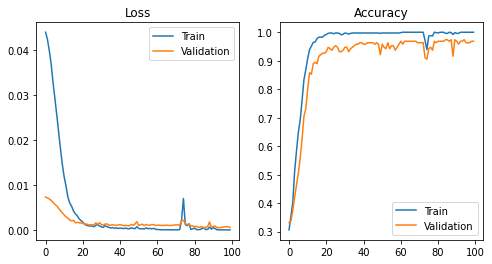

In [121]:
train_and_evaluate(cnn_gru, optimizer, data_loaders, num_epochs=EPOCHS)

# GAN Data Augmentation

In [51]:
fake_WGAN = np.load('./GAN/WGAN_generate_X_subject1.npy')
fake_label = np.load('./GAN/generate_label_subject1.npy')


fake_WGAN = np.swapaxes(fake_WGAN, 1,2)
fake_WGAN = np.swapaxes(fake_WGAN,2,3)


#Add 8460/4 fake data
x_train_plus = np.vstack((x_train, fake_WGAN[0:fake_WGAN.shape[0]//4]))
y_train_plus = np.vstack((y_train, fake_label[0:fake_WGAN.shape[0]//4]))
p = np.random.permutation(x_train.shape[0])
x_train_plus, y_train_plus = x_train_plus[p], y_train_plus[p]

In [52]:
data_loaders_gan = dataloader_setup(x_train_plus, y_train_plus, x_valid, y_valid, x_test, y_test, batch_size=32)

## CNN+GAN

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 0.00008
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 0.00015
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 0.00007
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00052, Accuracy: 187/190 (98.00%)
	Test loss: 0.02884, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 0.00009
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 0.00015
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 0.00006
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00053, Accuracy: 187/190 (98.00%)
	Test loss: 0.02880, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 0.00010
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 0.00015
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 0.00006
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00053, Accuracy: 187/190 (98.00%)
	Test loss: 0.02875, Accuracy: 67/200 (33.0

Training Progress: 	Epoch 25 [640/758 (83.33%)]		Loss: 0.00007
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00053, Accuracy: 187/190 (98.00%)
	Test loss: 0.02819, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.00010
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.00016
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.00009
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00053, Accuracy: 187/190 (98.00%)
	Test loss: 0.02818, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.00010
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.00013
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.00007
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00053, Accuracy: 187/190 (98.00%)
	Test loss: 0.02817, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.00009
Training Progress: 	Epoch 28 [320/758 (41.67%)]		

	Validation loss: 0.00050, Accuracy: 187/190 (98.00%)
	Test loss: 0.02782, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.00011
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.00014
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.00010
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00050, Accuracy: 187/190 (98.00%)
	Test loss: 0.02783, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.00010
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.00016
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.00009
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00050, Accuracy: 187/190 (98.00%)
	Test loss: 0.02781, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.00010
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.00015
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.00010
	Train loss: 0.00000, Accuracy: 758/

Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.00010
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00044, Accuracy: 188/190 (98.00%)
	Test loss: 0.02741, Accuracy: 69/200 (34.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.00011
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.00014
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.00010
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00043, Accuracy: 187/190 (98.00%)
	Test loss: 0.02744, Accuracy: 69/200 (34.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.00011
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.00014
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.00010
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00043, Accuracy: 187/190 (98.00%)
	Test loss: 0.02746, Accuracy: 69/200 (34.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.00011
Training Progress: 	Epoch 77 [320/758 (41.67%)]		

	Test loss: 0.02699, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.00012
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.00013
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.00010
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00039, Accuracy: 188/190 (98.00%)
	Test loss: 0.02694, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.00012
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.00015
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.00011
	Train loss: 0.00000, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00038, Accuracy: 188/190 (98.00%)
	Test loss: 0.02697, Accuracy: 66/200 (33.00%)

Best validation accuracy:
0.9894736842105263
Best test accuracy:
0.345


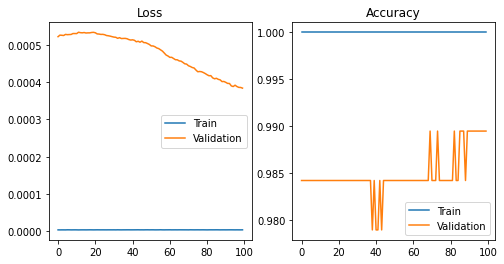

In [53]:
train_and_evaluate(cnn, optimizer, data_loaders_gan, num_epochs=EPOCHS)

## LSTM+GAN

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.40371
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.46005
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.30743
	Train loss: 0.04350, Accuracy: 218/758 (28.00%)
	Validation loss: 0.00725, Accuracy: 58/190 (30.00%)
	Test loss: 0.00688, Accuracy: 62/200 (31.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.36400
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.41351
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.27950
	Train loss: 0.04103, Accuracy: 293/758 (38.00%)
	Validation loss: 0.00700, Accuracy: 68/190 (35.00%)
	Test loss: 0.00692, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.30631
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.34525
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.23337
	Train loss: 0.03997, Accuracy: 336/758 (44.00%)
	Validation loss: 0.00690, Accuracy: 77/190 (40.00%)
	Test loss: 0.00688, Accuracy: 60/200 (30.00%)

T

	Train loss: 0.00406, Accuracy: 740/758 (97.00%)
	Validation loss: 0.00187, Accuracy: 164/190 (86.00%)
	Test loss: 0.01107, Accuracy: 66/200 (33.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.26858
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.21856
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.23201
	Train loss: 0.00313, Accuracy: 746/758 (98.00%)
	Validation loss: 0.00151, Accuracy: 173/190 (91.00%)
	Test loss: 0.01162, Accuracy: 61/200 (30.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.31900
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.29952
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.19037
	Train loss: 0.00299, Accuracy: 747/758 (98.00%)
	Validation loss: 0.00144, Accuracy: 172/190 (90.00%)
	Test loss: 0.01192, Accuracy: 63/200 (31.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.25966
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.24381
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Los

	Test loss: 0.01614, Accuracy: 56/200 (28.00%)

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.02602
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.24355
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.13730
	Train loss: 0.00047, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00057, Accuracy: 180/190 (94.00%)
	Test loss: 0.01524, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.11603
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.03657
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.04905
	Train loss: 0.00027, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00050, Accuracy: 184/190 (96.00%)
	Test loss: 0.01557, Accuracy: 63/200 (31.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.03390
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.06518
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.12959
	Train loss: 0.00034, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00051, Accuracy: 183/1

Training Progress: 	Epoch 74 [320/758 (41.67%)]		Loss: 0.02006
Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.05724
	Train loss: 0.00019, Accuracy: 757/758 (99.00%)
	Validation loss: 0.00036, Accuracy: 188/190 (98.00%)
	Test loss: 0.01692, Accuracy: 72/200 (36.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.02072
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.04825
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.03987
	Train loss: 0.00103, Accuracy: 751/758 (99.00%)
	Validation loss: 0.00055, Accuracy: 186/190 (97.00%)
	Test loss: 0.01740, Accuracy: 59/200 (29.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.09321
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.21652
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.02188
	Train loss: 0.00015, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00032, Accuracy: 185/190 (97.00%)
	Test loss: 0.01694, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Lo

	Train loss: 0.00027, Accuracy: 757/758 (99.00%)
	Validation loss: 0.00033, Accuracy: 187/190 (98.00%)
	Test loss: 0.01912, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.02436
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.01609
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.00815
	Train loss: 0.00004, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00005, Accuracy: 190/190 (100.00%)
	Test loss: 0.01923, Accuracy: 62/200 (31.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.03087
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.01151
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.01562
	Train loss: 0.00004, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00011, Accuracy: 189/190 (99.00%)
	Test loss: 0.01822, Accuracy: 65/200 (32.00%)

Best validation accuracy:
1.0
Best test accuracy:
0.395


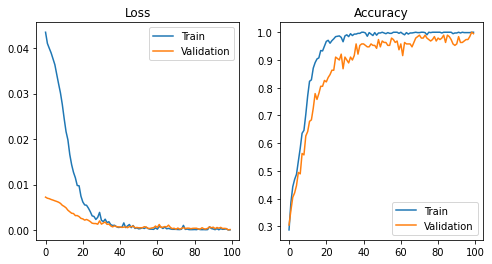

In [11]:
train_and_evaluate(lstm, optimizer, data_loaders_gan, num_epochs=EPOCHS)

## GRU+GAN

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.37147
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.35530
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.37244
	Train loss: 0.04242, Accuracy: 276/758 (36.00%)
	Validation loss: 0.00724, Accuracy: 56/190 (29.00%)
	Test loss: 0.00709, Accuracy: 42/200 (21.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.27678
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.34637
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.31693
	Train loss: 0.04122, Accuracy: 325/758 (42.00%)
	Validation loss: 0.00694, Accuracy: 81/190 (42.00%)
	Test loss: 0.00704, Accuracy: 47/200 (23.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.25697
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.33710
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.24420
	Train loss: 0.04008, Accuracy: 340/758 (44.00%)
	Validation loss: 0.00676, Accuracy: 88/190 (46.00%)
	Test loss: 0.00703, Accuracy: 56/200 (28.00%)

T

	Train loss: 0.00728, Accuracy: 710/758 (93.00%)
	Validation loss: 0.00239, Accuracy: 155/190 (81.00%)
	Test loss: 0.00955, Accuracy: 70/200 (35.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.40822
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.52685
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.34697
	Train loss: 0.00557, Accuracy: 724/758 (95.00%)
	Validation loss: 0.00203, Accuracy: 163/190 (85.00%)
	Test loss: 0.00962, Accuracy: 69/200 (34.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.35313
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.45803
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.36434
	Train loss: 0.00628, Accuracy: 719/758 (94.00%)
	Validation loss: 0.00222, Accuracy: 163/190 (85.00%)
	Test loss: 0.00989, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.44727
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.35530
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Los

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.14197
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.19961
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.11875
	Train loss: 0.00064, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00092, Accuracy: 181/190 (95.00%)
	Test loss: 0.01321, Accuracy: 77/200 (38.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.09224
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.22536
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.12761
	Train loss: 0.00047, Accuracy: 757/758 (99.00%)
	Validation loss: 0.00087, Accuracy: 179/190 (94.00%)
	Test loss: 0.01367, Accuracy: 75/200 (37.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.11050
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.17009
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.21942
	Train loss: 0.00067, Accuracy: 755/758 (99.00%)
	Validation loss: 0.00097, Accuracy: 177/190 (93.00%)
	Test loss: 0.01273, Accuracy: 67/200

Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.07688
	Train loss: 0.00029, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00053, Accuracy: 184/190 (96.00%)
	Test loss: 0.01597, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.02035
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.06291
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.04210
	Train loss: 0.00038, Accuracy: 756/758 (99.00%)
	Validation loss: 0.00060, Accuracy: 185/190 (97.00%)
	Test loss: 0.01519, Accuracy: 71/200 (35.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.09231
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.05559
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.40008
	Train loss: 0.00023, Accuracy: 757/758 (99.00%)
	Validation loss: 0.00089, Accuracy: 180/190 (94.00%)
	Test loss: 0.01710, Accuracy: 60/200 (30.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.06984
Training Progress: 	Epoch 77 [320/758 (41.67%)]		Los

	Validation loss: 0.00041, Accuracy: 185/190 (97.00%)
	Test loss: 0.01788, Accuracy: 64/200 (32.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.00860
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.02537
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.00685
	Train loss: 0.00008, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00050, Accuracy: 185/190 (97.00%)
	Test loss: 0.01632, Accuracy: 63/200 (31.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.02485
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.02248
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.06288
	Train loss: 0.00008, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00076, Accuracy: 183/190 (96.00%)
	Test loss: 0.01652, Accuracy: 70/200 (35.00%)

Best validation accuracy:
0.9842105263157894
Best test accuracy:
0.395


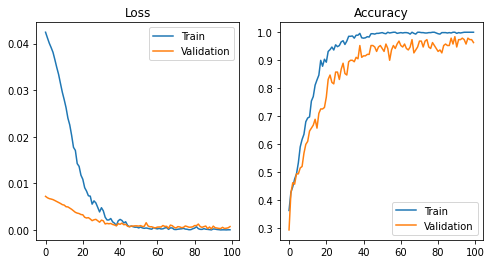

In [14]:
train_and_evaluate(gru, optimizer, data_loaders_gan, num_epochs=EPOCHS)

## CNN+LSTM+GAN

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.41442
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.43428
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.53138
	Train loss: 0.04400, Accuracy: 195/758 (25.00%)
	Validation loss: 0.00733, Accuracy: 45/190 (23.00%)
	Test loss: 0.00697, Accuracy: 48/200 (24.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.36542
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.37046
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.47290
	Train loss: 0.04363, Accuracy: 195/758 (25.00%)
	Validation loss: 0.00726, Accuracy: 45/190 (23.00%)
	Test loss: 0.00691, Accuracy: 49/200 (24.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.41576
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.38041
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.30510
	Train loss: 0.04202, Accuracy: 280/758 (36.00%)
	Validation loss: 0.00709, Accuracy: 61/190 (32.00%)
	Test loss: 0.00670, Accuracy: 72/200 (36.00%)

T

	Train loss: 0.00612, Accuracy: 710/758 (93.00%)
	Validation loss: 0.00264, Accuracy: 151/190 (79.00%)
	Test loss: 0.01297, Accuracy: 58/200 (29.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.23457
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.09452
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.06846
	Train loss: 0.00141, Accuracy: 754/758 (99.00%)
	Validation loss: 0.00152, Accuracy: 173/190 (91.00%)
	Test loss: 0.01436, Accuracy: 50/200 (25.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.09029
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.06337
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.06872
	Train loss: 0.00503, Accuracy: 722/758 (95.00%)
	Validation loss: 0.00237, Accuracy: 162/190 (85.00%)
	Test loss: 0.01420, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.09864
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.06281
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Los

Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.01838
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.01936
	Train loss: 0.00032, Accuracy: 757/758 (99.00%)
	Validation loss: 0.00072, Accuracy: 182/190 (95.00%)
	Test loss: 0.01731, Accuracy: 59/200 (29.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.02332
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.01212
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.02342
	Train loss: 0.00023, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00076, Accuracy: 183/190 (96.00%)
	Test loss: 0.01700, Accuracy: 63/200 (31.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.01645
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.03518
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.01600
	Train loss: 0.00025, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00070, Accuracy: 184/190 (96.00%)
	Test loss: 0.01726, Accuracy: 61/200 (30.00%)

Training Progress: 	Epoch 53 [0/758 (0.00%)]		L

	Train loss: 0.00006, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00051, Accuracy: 184/190 (96.00%)
	Test loss: 0.02049, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.00691
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.00671
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.00744
	Train loss: 0.00006, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00053, Accuracy: 184/190 (96.00%)
	Test loss: 0.02040, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.00559
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.00885
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.00736
	Train loss: 0.00005, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00054, Accuracy: 184/190 (96.00%)
	Test loss: 0.02095, Accuracy: 63/200 (31.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.00550
Training Progress: 	Epoch 77 [320/758 (41.67%)]		Loss: 0.01385
Training Progress: 	Epoch 77 [640/758 (83.33%)]		

	Test loss: 0.02293, Accuracy: 61/200 (30.00%)

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.00385
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.00282
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.00412
	Train loss: 0.00003, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00075, Accuracy: 183/190 (96.00%)
	Test loss: 0.02279, Accuracy: 65/200 (32.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.00351
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.02384
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.00532
	Train loss: 0.00002, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00076, Accuracy: 184/190 (96.00%)
	Test loss: 0.02310, Accuracy: 63/200 (31.00%)

Best validation accuracy:
0.9789473684210527
Best test accuracy:
0.38


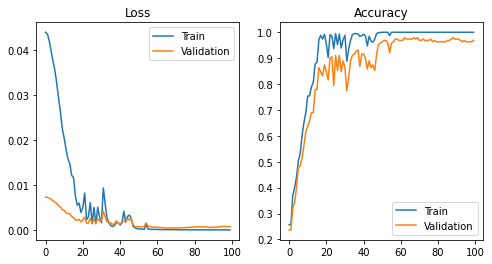

In [17]:
train_and_evaluate(cnn_lstm, optimizer, data_loaders_gan, num_epochs=EPOCHS)

## CNN+GRU+GAN

Training Progress: 	Epoch 1 [0/758 (0.00%)]		Loss: 1.53420
Training Progress: 	Epoch 1 [320/758 (41.67%)]		Loss: 1.56406
Training Progress: 	Epoch 1 [640/758 (83.33%)]		Loss: 1.46938
	Train loss: 0.04446, Accuracy: 186/758 (24.00%)
	Validation loss: 0.00739, Accuracy: 46/190 (24.00%)
	Test loss: 0.00698, Accuracy: 56/200 (28.00%)

Training Progress: 	Epoch 2 [0/758 (0.00%)]		Loss: 1.46629
Training Progress: 	Epoch 2 [320/758 (41.67%)]		Loss: 1.47431
Training Progress: 	Epoch 2 [640/758 (83.33%)]		Loss: 1.44414
	Train loss: 0.04309, Accuracy: 245/758 (32.00%)
	Validation loss: 0.00723, Accuracy: 60/190 (31.00%)
	Test loss: 0.00688, Accuracy: 53/200 (26.00%)

Training Progress: 	Epoch 3 [0/758 (0.00%)]		Loss: 1.37486
Training Progress: 	Epoch 3 [320/758 (41.67%)]		Loss: 1.39519
Training Progress: 	Epoch 3 [640/758 (83.33%)]		Loss: 1.32770
	Train loss: 0.04154, Accuracy: 315/758 (41.00%)
	Validation loss: 0.00708, Accuracy: 66/190 (34.00%)
	Test loss: 0.00688, Accuracy: 55/200 (27.00%)

T

	Train loss: 0.00310, Accuracy: 744/758 (98.00%)
	Validation loss: 0.00154, Accuracy: 173/190 (91.00%)
	Test loss: 0.01291, Accuracy: 62/200 (31.00%)

Training Progress: 	Epoch 26 [0/758 (0.00%)]		Loss: 0.07361
Training Progress: 	Epoch 26 [320/758 (41.67%)]		Loss: 0.10969
Training Progress: 	Epoch 26 [640/758 (83.33%)]		Loss: 0.10638
	Train loss: 0.00549, Accuracy: 715/758 (94.00%)
	Validation loss: 0.00182, Accuracy: 169/190 (88.00%)
	Test loss: 0.01277, Accuracy: 67/200 (33.00%)

Training Progress: 	Epoch 27 [0/758 (0.00%)]		Loss: 0.13926
Training Progress: 	Epoch 27 [320/758 (41.67%)]		Loss: 0.14193
Training Progress: 	Epoch 27 [640/758 (83.33%)]		Loss: 0.07942
	Train loss: 0.00474, Accuracy: 724/758 (95.00%)
	Validation loss: 0.00145, Accuracy: 174/190 (91.00%)
	Test loss: 0.01325, Accuracy: 62/200 (31.00%)

Training Progress: 	Epoch 28 [0/758 (0.00%)]		Loss: 0.09563
Training Progress: 	Epoch 28 [320/758 (41.67%)]		Loss: 0.06254
Training Progress: 	Epoch 28 [640/758 (83.33%)]		Los

Training Progress: 	Epoch 50 [0/758 (0.00%)]		Loss: 0.01240
Training Progress: 	Epoch 50 [320/758 (41.67%)]		Loss: 0.01416
Training Progress: 	Epoch 50 [640/758 (83.33%)]		Loss: 0.01089
	Train loss: 0.00011, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00029, Accuracy: 188/190 (98.00%)
	Test loss: 0.01505, Accuracy: 74/200 (37.00%)

Training Progress: 	Epoch 51 [0/758 (0.00%)]		Loss: 0.00829
Training Progress: 	Epoch 51 [320/758 (41.67%)]		Loss: 0.03240
Training Progress: 	Epoch 51 [640/758 (83.33%)]		Loss: 0.01176
	Train loss: 0.00011, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00031, Accuracy: 188/190 (98.00%)
	Test loss: 0.01495, Accuracy: 75/200 (37.00%)

Training Progress: 	Epoch 52 [0/758 (0.00%)]		Loss: 0.00654
Training Progress: 	Epoch 52 [320/758 (41.67%)]		Loss: 0.01316
Training Progress: 	Epoch 52 [640/758 (83.33%)]		Loss: 0.01501
	Train loss: 0.00070, Accuracy: 755/758 (99.00%)
	Validation loss: 0.00036, Accuracy: 187/190 (98.00%)
	Test loss: 0.01563, Accuracy: 72/2

Training Progress: 	Epoch 74 [640/758 (83.33%)]		Loss: 0.02072
	Train loss: 0.00005, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00024, Accuracy: 188/190 (98.00%)
	Test loss: 0.01752, Accuracy: 71/200 (35.00%)

Training Progress: 	Epoch 75 [0/758 (0.00%)]		Loss: 0.00528
Training Progress: 	Epoch 75 [320/758 (41.67%)]		Loss: 0.02082
Training Progress: 	Epoch 75 [640/758 (83.33%)]		Loss: 0.00535
	Train loss: 0.00005, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00024, Accuracy: 187/190 (98.00%)
	Test loss: 0.01782, Accuracy: 70/200 (35.00%)

Training Progress: 	Epoch 76 [0/758 (0.00%)]		Loss: 0.01007
Training Progress: 	Epoch 76 [320/758 (41.67%)]		Loss: 0.00920
Training Progress: 	Epoch 76 [640/758 (83.33%)]		Loss: 0.00542
	Train loss: 0.00005, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00024, Accuracy: 187/190 (98.00%)
	Test loss: 0.01772, Accuracy: 69/200 (34.00%)

Training Progress: 	Epoch 77 [0/758 (0.00%)]		Loss: 0.00766
Training Progress: 	Epoch 77 [320/758 (41.67%)]		

Training Progress: 	Epoch 99 [0/758 (0.00%)]		Loss: 0.00407
Training Progress: 	Epoch 99 [320/758 (41.67%)]		Loss: 0.00636
Training Progress: 	Epoch 99 [640/758 (83.33%)]		Loss: 0.00424
	Train loss: 0.00006, Accuracy: 758/758 (100.00%)
	Validation loss: 0.00018, Accuracy: 189/190 (99.00%)
	Test loss: 0.01888, Accuracy: 65/200 (32.00%)

Training Progress: 	Epoch 100 [0/758 (0.00%)]		Loss: 0.00645
Training Progress: 	Epoch 100 [320/758 (41.67%)]		Loss: 0.00841
Training Progress: 	Epoch 100 [640/758 (83.33%)]		Loss: 0.00710
	Train loss: 0.00009, Accuracy: 757/758 (99.00%)
	Validation loss: 0.00026, Accuracy: 188/190 (98.00%)
	Test loss: 0.01858, Accuracy: 64/200 (32.00%)

Best validation accuracy:
0.9947368421052631
Best test accuracy:
0.405


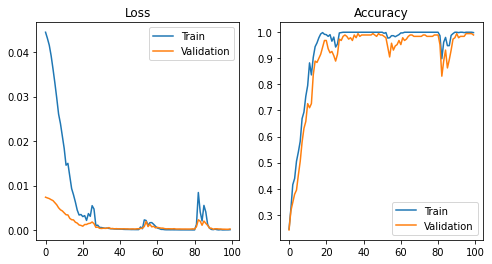

In [20]:
train_and_evaluate(cnn_gru, optimizer, data_loaders_gan, num_epochs=EPOCHS)